## 1624 Final Project

In [1]:
#Import Libraries
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
%matplotlib inline
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import time
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
from gensim.models import CoherenceModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/angelahsu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/angelahsu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/funcy/colls.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, Set, Iterable, Iterator, defaultdict
/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/funcy/colls.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, Set, Iterable, Iterator, defaultdict
/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/funcy/colls.py:6: Depreca

In [3]:
df = pd.read_csv('metadata.csv')
df.info(verbose=True)
df.head()

/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497906 entries, 0 to 497905
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          497906 non-null  object 
 1   sha               172105 non-null  object 
 2   source_x          497906 non-null  object 
 3   title             497674 non-null  object 
 4   doi               281753 non-null  object 
 5   pmcid             182522 non-null  object 
 6   pubmed_id         241936 non-null  object 
 7   license           497906 non-null  object 
 8   abstract          363064 non-null  object 
 9   publish_time      497687 non-null  object 
 10  authors           484020 non-null  object 
 11  journal           464755 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  197568 non-null  object 
 14  arxiv_id          6687 non-null    object 
 15  pdf_json_files    172105 non-null  object 
 16  pmc_json_files    13

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


## Data Cleaning

In [3]:
# load the meta data from the CSV file and extract out fields that will be useful to our application

df = df[['title','abstract','authors','publish_time']]
df = df.drop_duplicates(subset='abstract', keep="first")
df = df.dropna()
df["abstract"] = df["abstract"].str.lower()
df.head()

/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,abstract,authors,publish_time
0,Clinical features of culture-proven Mycoplasma...,objective: this retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15
2,Surfactant protein-D and pulmonary host defense,surfactant protein-d (sp-d) participates in th...,"Crouch, Erika C",2000-08-25
3,Role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321013 entries, 0 to 497905
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         321013 non-null  object
 1   abstract      321013 non-null  object
 2   authors       321013 non-null  object
 3   publish_time  321013 non-null  object
dtypes: object(4)
memory usage: 12.2+ MB


/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Preprocess

Preprocess the abstract by removing puntuation, lowercase, remove stopwords, lemmatize words. Save the preprocessed abstract into 'processed_abs'.

In [6]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'et', 'el', 'de', 'la', 'le', 
                   'igg', 'ci', 'ct', 'doi', 'preprint', 'copyright', 'peer', 'reviewed', 
                   'org', 'https', 'et', 'al', 'author', 'figure', 'rights', 'reserved', 
                   'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 
                   'fig.', 'al.', 'Elsevier', 'PMC', 'CZI', 'www'])

def preprocess(text):
    
    # remove punctuation
    text = re.sub('[,\.!?]', '', text)
    
    #lowercase
    text = text.lower()
    
    #remove stop words 
    text = [word for word in tokenizer.tokenize(text) if word not in stop_words]
    
    #lemmatize words
    text = [lemmatizer.lemmatize(word, pos='v') for word in text]
    text = [lemmatizer.lemmatize(word, pos='n') for word in text]
    
    text = " ".join([i for i in text])

    return text

df['processed_abs'] = df['abstract'].map(preprocess)
df.head()

/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:13: DeprecationWarning: invalid escape sequence \.
<>:13: DeprecationWarning: invalid escape sequence \.
<ipython-input-6-0fcdc879d56c>:13: DeprecationWarning: invalid escape sequence \.
  text = re.sub('[,\.!?]', '', text)


,title,abstract,authors,publish_time,processed_abs
0,Clinical features of culture-proven Mycoplasma...,objective: this retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04,objective retrospective chart review describe ...
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15,inflammatory disease respiratory tract commonl...
2,Surfactant protein-D and pulmonary host defense,surfactant protein-d (sp-d) participates in th...,"Crouch, Erika C",2000-08-25,surfactant protein sp participate innate respo...
3,Role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22,endothelin 1 1 21 amino acid peptide diverse b...
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11,respiratory syncytial virus rsv pneumonia viru...


In [43]:
# Check the top 20 most frequent words in abstract 
import itertools
import nltk
nltk.download('punkt') 
top_N = 20
pre = df['processed_abs'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(pre)
words_selected = [i for i in words if len(i) > 2]
words_dist = nltk.FreqDist(words_selected)
words_fre = pd.DataFrame(words_dist.most_common(top_N),columns=['Word', 'Frequency'])
words_fre

[nltk_data] Downloading package punkt to /Users/angelahsu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Word,Frequency
0,covid,511780
1,patient,471427
2,study,282750
3,disease,224585
4,result,214090
5,sars,194739
6,cov,186766
7,infection,185761
8,health,177699
9,pandemic,173097


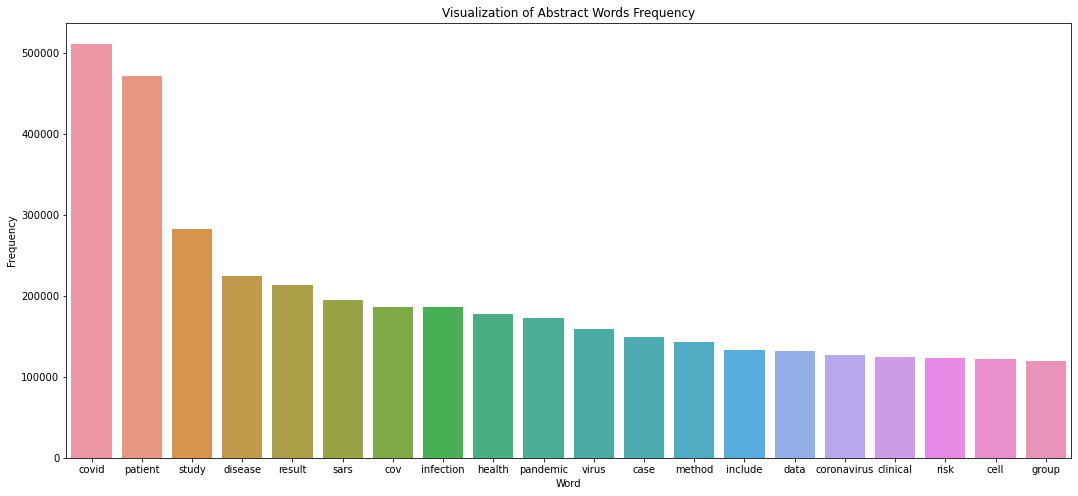

In [46]:
plt.figure(figsize=(18,8))
sns.barplot(data=words_fre, x= 'Word', y = 'Frequency').set_title('Visualization of Abstract Words Frequency')
plt.show()

## Data Visualization and Exploratory Data Analysis

**1. Visualize Prevalent Symptoms**

The first theme is the prevalent symptoms of Covid 19. The symptoms are 'cold', 'fever', 'cough', 'rhinitis', 'sore throat', 'hoarseness', 'bronchitis', 'bronchiolitis', 'pneumonia', 'shortness of breath'. As the histogram below shown, 'pneumonia', 'fever' and 'cough' are three main symptoms that are related to Covid 19. On the other hand, 'rhinitis', 'sore throat', 'hoarseness', 'bronchitis' are much less prevalent.

In [38]:
#Define list of symptoms

symptoms = ['cold', 'fever', 'cough', 'rhinitis', 'sore throat', 'hoarseness', 'bronchitis', 
            'bronchiolitis', 'pneumonia', 'shortness of breath']

{'cold': 0, 'fever': 0, 'cough': 0, 'rhinitis': 0, 'sore throat': 0, 'hoarseness': 0, 'bronchitis': 0, 'bronchiolitis': 0, 'pneumonia': 0, 'shortness of breath': 0}
{'cold': 2244, 'fever': 11573, 'cough': 7566, 'rhinitis': 390, 'sore throat': 1059, 'hoarseness': 55, 'bronchitis': 1703, 'bronchiolitis': 701, 'pneumonia': 16976, 'shortness of breath': 1604}


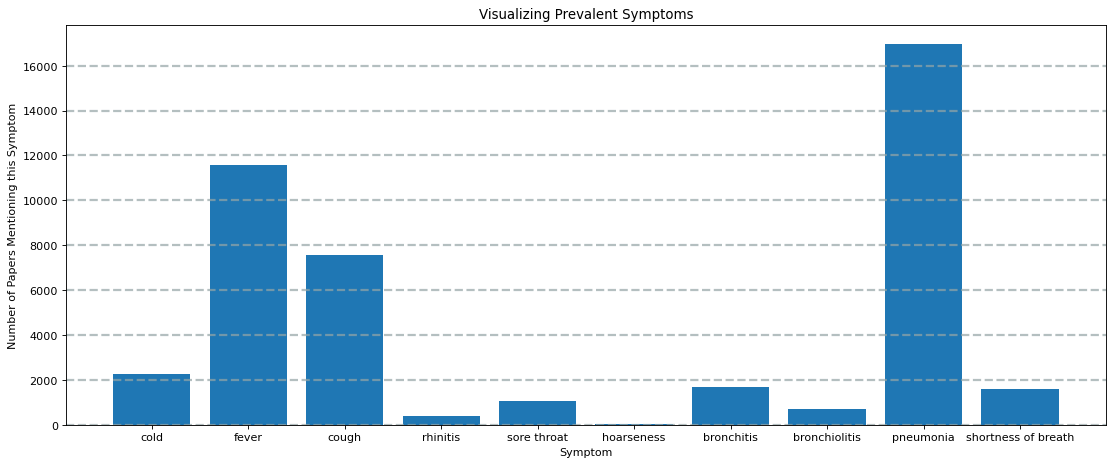

In [39]:
#Lets do some preliminary exploratory data analysis

symptom_count = dict((symptom,0) for symptom in symptoms)

print(symptom_count)

for symptom in symptom_count:
    for abstract in df['abstract']:
        if str(symptom) in abstract:
            symptom_count[symptom] += 1


print(symptom_count)

loc = np.arange(len(symptom_count))
width = 0.35

fig = plt.figure(num=None, constrained_layout=True, figsize=(13, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

ax.bar(symptom_count.keys(),symptom_count.values())
ax.set_xticks(loc, tuple(symptoms))

ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax.set_ylabel('Number of Papers Mentioning this Symptom')
ax.set_xlabel('Symptom')
ax.set_title('Visualizing Prevalent Symptoms')
plt.show()

**2. Visualize Connection to Animals**

The second theme is the connection to animals. Since there are potential virus sources from animals, we can pay attention to 'birds','bats','camels',and 'pigs'. As the histogram below shown, pig has the highest count which is even more than the count of bats. On the contrary, the count of camels is the lowest and is about 400, thus can be ignored.

In [8]:
#Define list of animals 

animals = ['camels','birds','bats','pigs']

{'camels': 0, 'birds': 0, 'bats': 0, 'pigs': 0}
{'camels': 449, 'birds': 1070, 'bats': 1764, 'pigs': 2099}


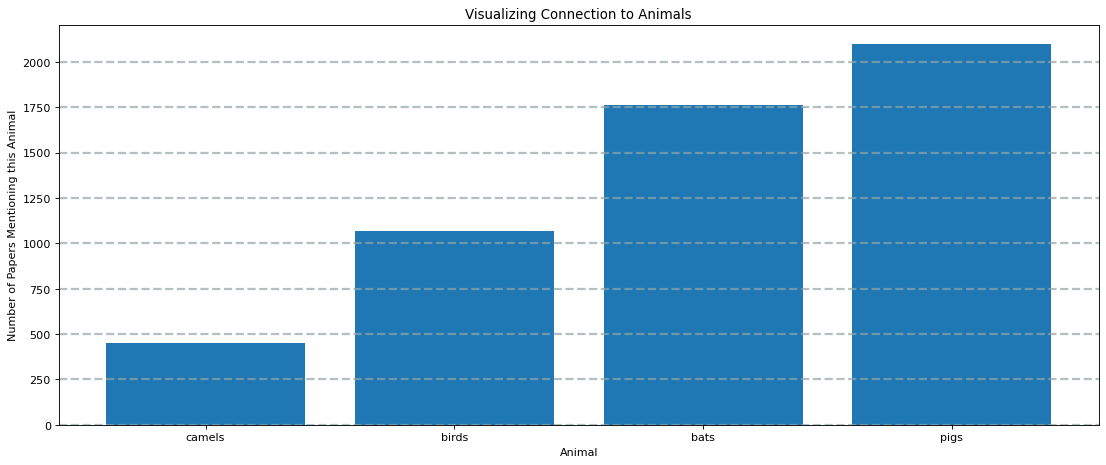

In [9]:
#Lets do some preliminary exploratory data analysis

animal_count = dict((animal,0) for animal in animals)

print(animal_count)

for animal in animal_count:
    for abstract in df['abstract']:
        if str(animal) in abstract:
            animal_count[animal] += 1


print(animal_count)

loc = np.arange(len(animal_count))
width = 0.35

fig = plt.figure(num=None, constrained_layout=True, figsize=(13, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

ax.bar(animal_count.keys(),animal_count.values())
ax.set_xticks(loc, tuple(animals))

ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax.set_ylabel('Number of Papers Mentioning this Animal')
ax.set_xlabel('Animal')
ax.set_title('Visualizing Connection to Animals')
plt.show()

**3. Visualizing Group of People**

The third theme is the age group. By comparing different age groups from infant to elders, we can see that the old people are likely to get infected because the count of old people is significantly higher than that of other age groups. Infants and teens, on the contrary, are much less.

In [10]:
groups = ['infant','teen','adult','old']

{'infant': 0, 'teen': 0, 'adult': 0, 'old': 0}
{'infant': 3801, 'teen': 5845, 'adult': 19117, 'old': 48422}


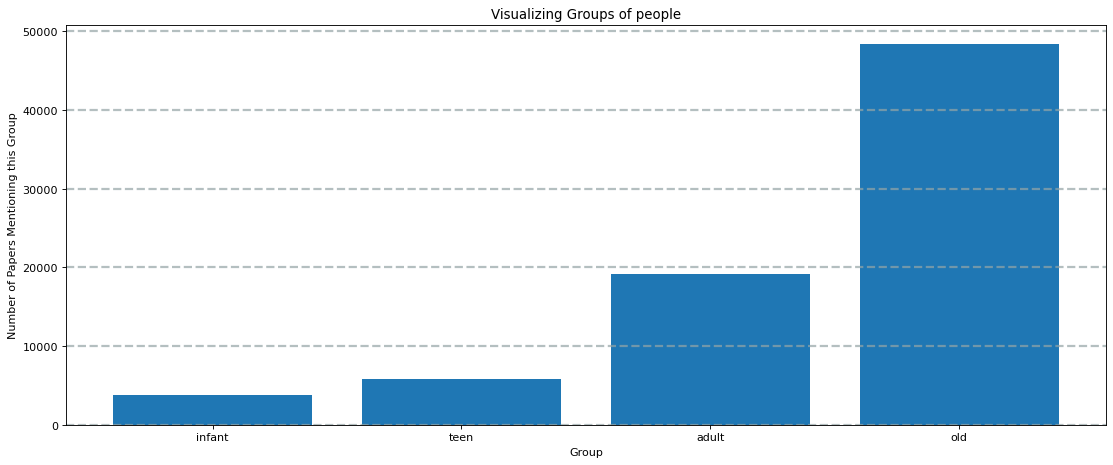

In [10]:
group_count = dict((group,0) for group in groups)

print(group_count)

for group in group_count:
    for abstract in df['abstract']:
        if str(group) in abstract:
            group_count[group] += 1


print(group_count)

loc = np.arange(len(group_count))
width = 0.35

fig = plt.figure(num=None, constrained_layout=True, figsize=(13, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

ax.bar(group_count.keys(),group_count.values())
ax.set_xticks(loc, tuple(groups))

ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax.set_ylabel('Number of Papers Mentioning this Group')
ax.set_xlabel('Group')
ax.set_title('Visualizing Groups of people')
plt.show()

**4. Visualize Ways of Transmission**

The fourth theme is the ways of transmissions. Virus can be transmitted through 'mouth','nose','eye',and 'hand'. It can be shown that the transmission of virus from nose is the most prevalent one and the transmission of virus from hand is also highly likely. On the contrary, 'mouth' is the least mentioned.

In [9]:
transmissions = ['mouth','eye','hand','nose']

{'mouth': 0, 'eye': 0, 'hand': 0, 'nose': 0}
{'mouth': 1472, 'eye': 4896, 'hand': 12858, 'nose': 16713}


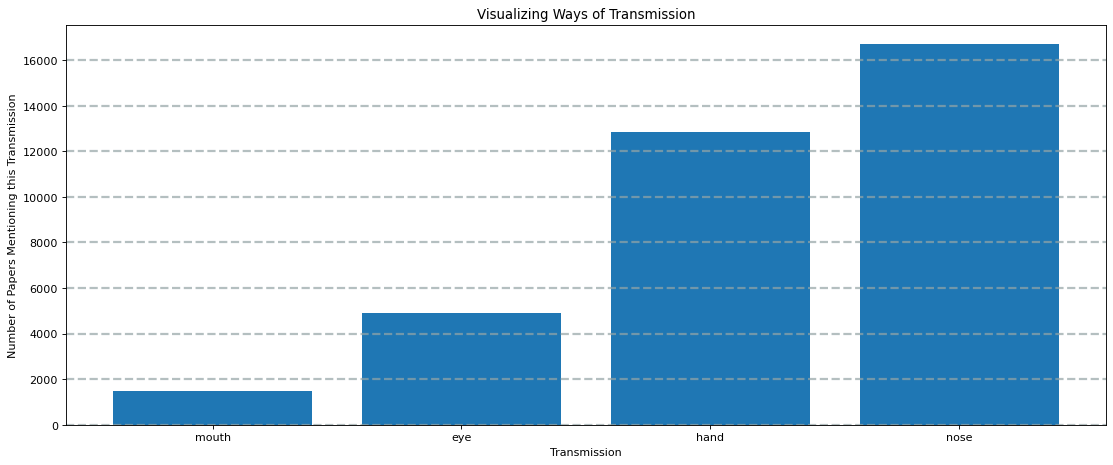

In [10]:
transmission_count = dict((transmission,0) for transmission in transmissions)

print(transmission_count)

for transmission in transmission_count:
    for abstract in df['abstract']:
        if str(transmission) in abstract:
            transmission_count[transmission] += 1


print(transmission_count)

loc = np.arange(len(transmission_count))
width = 0.35

fig = plt.figure(num=None, constrained_layout=True, figsize=(13, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

ax.bar(transmission_count.keys(),transmission_count.values())
ax.set_xticks(loc, tuple(transmissions))

ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax.set_ylabel('Number of Papers Mentioning this Transmission')
ax.set_xlabel('Transmission')
ax.set_title('Visualizing Ways of Transmission')
plt.show()

**5. Visualize Word Cloud of Abstract**

The wordcloud of abstracts shows the most frequent word appeared, such as 'sars', 'cov', 'patient', 'pandemic', and 'covid'.

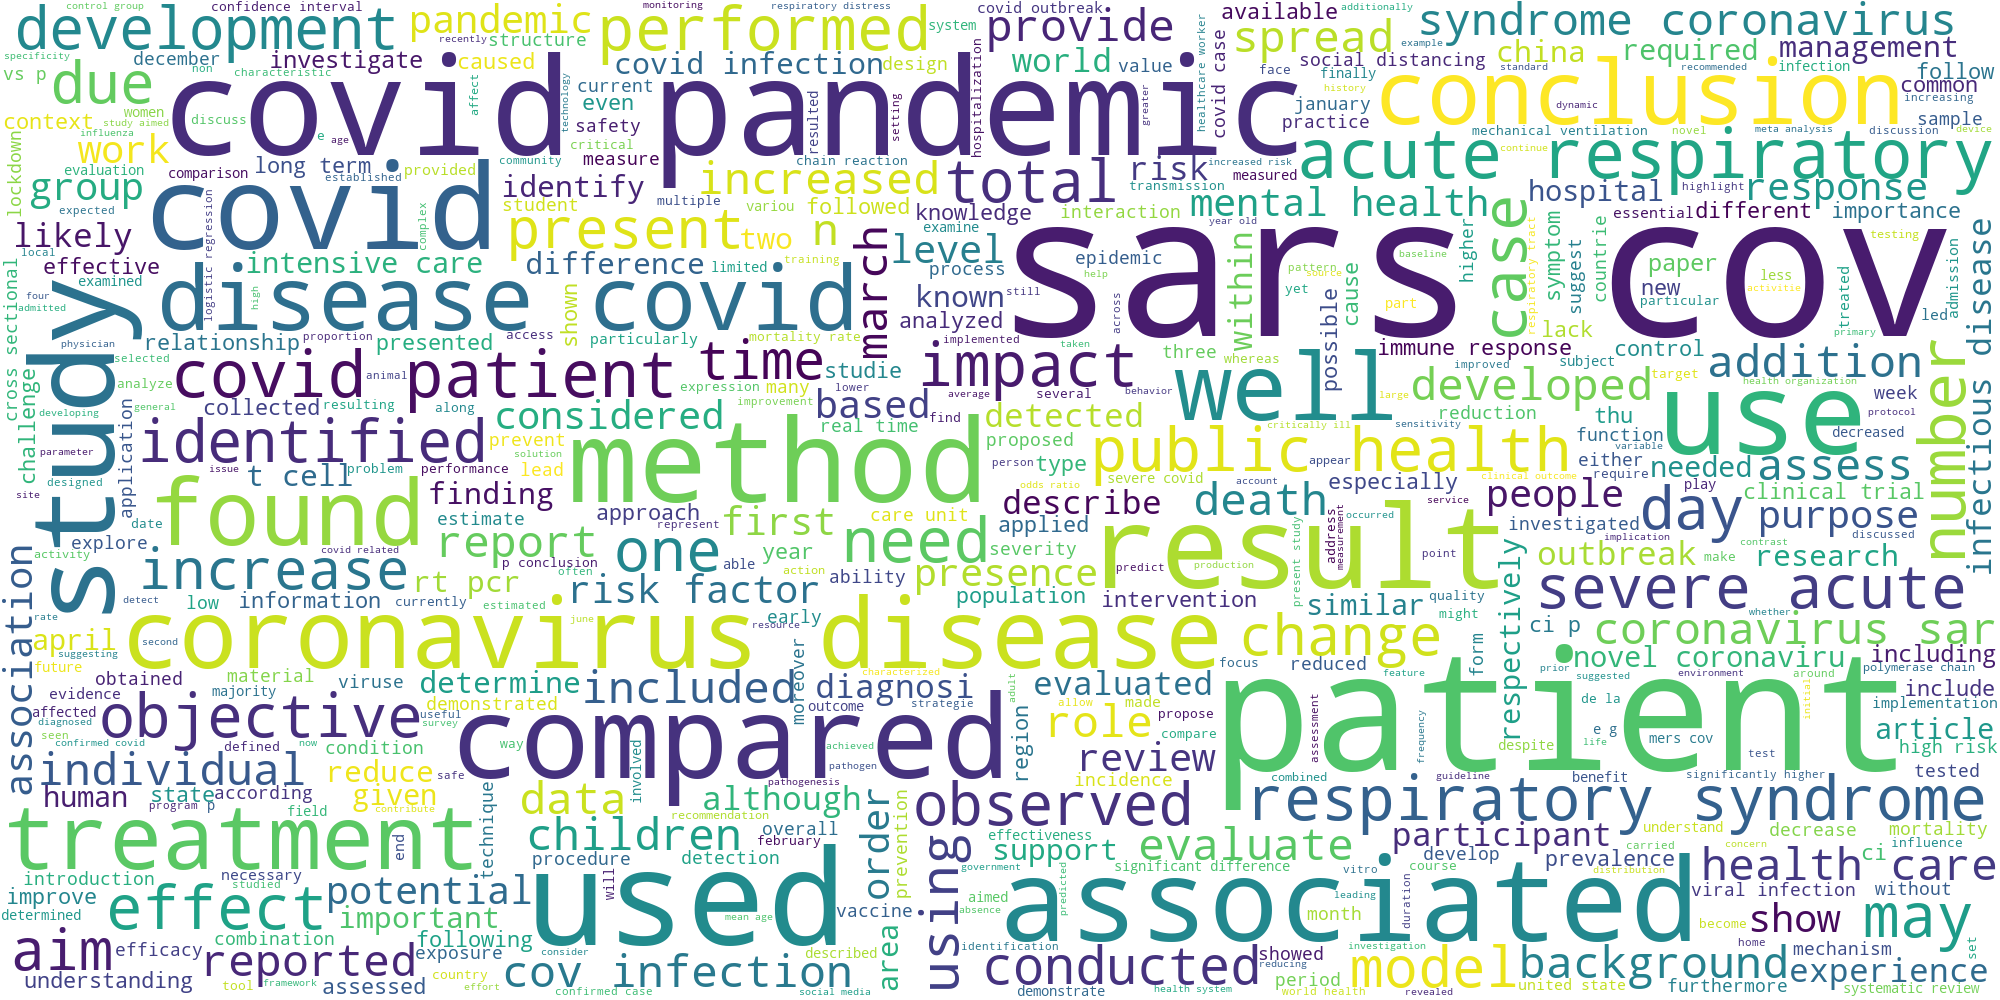

<Figure size 864x720 with 0 Axes>

In [17]:
# Join the different processed titles together.
long_str_abs = ','.join(list(df['abstract'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue', width=2000, height=1000, max_font_size=200)

# Generate a word cloud
wordcloud.generate(long_str_abs)

# Visualize the word cloud
plt.figure(figsize=(12,10))
wordcloud.to_image()

## Model selection and fitting to data

1. **Unsupervised Machine Learning Models**

    - Dimensionality Reduction using PCA
    - K-Means Clustering
    - Topic Modeling use LDA

2. **Supervised Machine Learning Models**

    - Logistic Regression

    - Random Forest

    - Stochastic Gradient Descent 
    

### 1. PCA Dimensionality Reduction

In [7]:
# Transform abstract to TFIDF features and set max_features to be 1000
vec_tf = TfidfVectorizer(max_features=1000)
abs_tf = vec_tf.fit_transform(df['processed_abs'])

/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
pca = PCA(n_components=0.95, random_state=42)
abs_reduced= pca.fit_transform(abs_tf.toarray())
abs_reduced.shape

/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(321013, 857)

### 2. K-Means Clustering

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. There are two assumptions are the basis of the k-means model.

1. The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
2. Each point is closer to its own cluster center than to other cluster centers.

##### The Elbow Method

To evaluate the performance of our k-means algorithm we can take a look at the Inertia or objective function value. This is essentially the sum of squared distances our data points are away from their cluster centroid.
By looking at different Inertia values for different numbers of clusters (K): the “elbow” of the inertia graph gives the optimum number of clusters for our data. This is the point before a roughly linear decrease in Inertia — which in this case is k = 8.

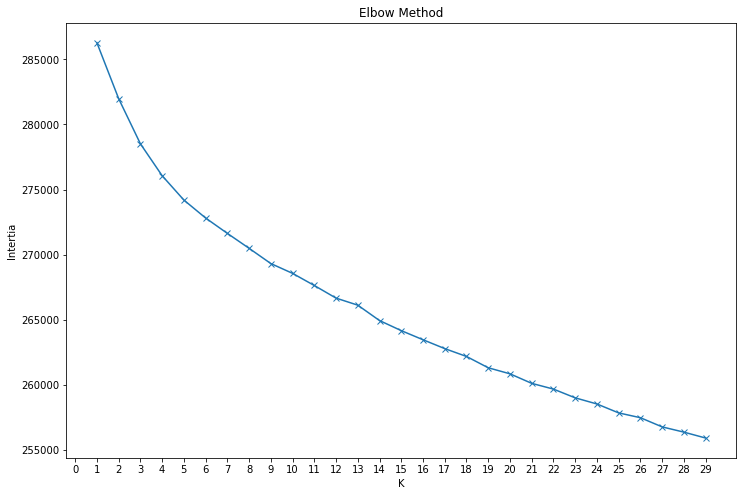

In [8]:
intertia = []
# run kmeans with many different k
K = range(1,30)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(abs_reduced)
    intertia.append(k_means.inertia_)

plt.figure(figsize=(12,8))
plt.plot(K, intertia, marker= "x")
plt.xlabel('K')
plt.xticks(np.arange(30))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

##### Predict and Plot

The clusters and centroids produced from our k-mean algorithm can be used to place any abstract data collected from new reseach paper into a cluster, essentially giving us a prediction of the research type. The predictions are stored in column "y".

In [9]:
k_means = KMeans(n_clusters=8, n_init = 8, init = "random", random_state = 42)
y_pred = k_means.fit_predict(abs_reduced)
df['y'] = y_pred

/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# dataframe with column y_pred
df.head()

/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,abstract,authors,publish_time,processed_abs,y
0,Clinical features of culture-proven Mycoplasma...,objective: this retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04,objective retrospective chart review describe ...,1
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15,inflammatory disease respiratory tract commonl...,5
2,Surfactant protein-D and pulmonary host defense,surfactant protein-d (sp-d) participates in th...,"Crouch, Erika C",2000-08-25,surfactant protein sp participate innate respo...,6
3,Role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22,endothelin 1 1 21 amino acid peptide diverse b...,5
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11,respiratory syncytial virus rsv pneumonia viru...,6


##### Interpret K-Means Clustering Model

A K-means clustering algorithm tries to group similar items in the form of clusters. As the graph shown, there are 8 clusters and each has a black centroid labeled in the center. It can be shown that the digits are very clearly clustered in their own sub groups, but most of the groups are side by side and not seperated from each other clearly. Group 0 (red), group 4 (blue), group 5 (dark blue), group 6 (purple), and group 7 (pink) are tightly clustered to the center. However, group 1 (yellow), group 2 (chartreuse), and group 3 (green) are deviated from the center and distributed all over. Therefore, K-Means Clustering model is not recommended.

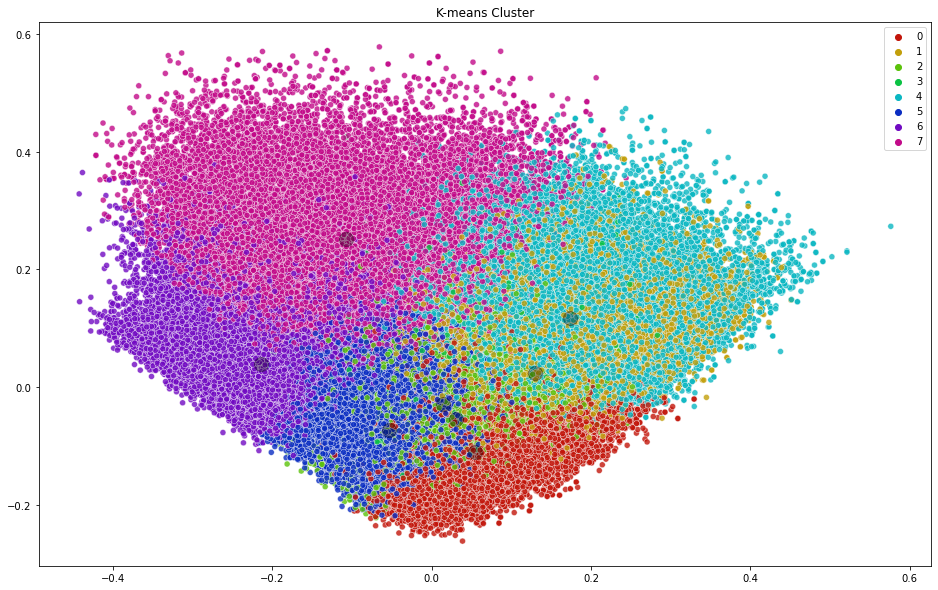

In [10]:
plt.figure(figsize=(16,10))
# Plot clusters
sns.scatterplot(abs_reduced[:,0], abs_reduced[:,1], hue=y_pred, legend='full', \
                palette=sns.hls_palette(8, l=.4, s=.9), alpha=0.8)

# Plot centers
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha = 0.3);
plt.title('K-means Cluster')
plt.show()

### 3. Topic Modeling using LDA

Topic modeling is a branch of unsupervised natural language processing which is used to represent a text document with the help of several topics. This can be thought in terms of clustering, but with a difference. Now, instead of numerical features, we have a collection of words that we want to group together in such a way that each group represents a topic in a document.

LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.
We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:
1. psi, the distribution of words for each topic K
2. phi, the distribution of topics for each document i

##### Preprocessed for LDA Model

Use gensim.utils.simple_preprocess to further preprocess the text.

In [14]:
data = df.processed_abs.tolist()

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data_words = list(sent_to_words(data))

##### Creat Dictionary and Corpus needed for Topic Modeling
The two main inputs to the LDA topic model are the dictionary (id2word) and the corpus. Gensim creates a unique id for each word in the document. The produced corpus shown below is a mapping of (word_id, word_frequency).

In [15]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 5), (14, 1), (15, 4), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


##### Train LDA Model and View the Topics

The LDA model is built with 8 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic. We can see the keywords for each topic and the weightage of each keyword using lda_model.print_topics() as shown below.

In [16]:
# number of topics
num_topics = 8

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 8 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"model" + 0.010*"data" + 0.007*"base" + 0.007*"method" + '
  '0.007*"result" + 0.006*"study" + 0.006*"time" + 0.005*"show" + '
  '0.005*"analysis" + 0.005*"different"'),
 (1,
  '0.020*"cell" + 0.015*"protein" + 0.012*"cov" + 0.012*"sars" + 0.008*"drug" '
  '+ 0.007*"viral" + 0.007*"virus" + 0.006*"bind" + 0.006*"target" + '
  '0.005*"immune"'),
 (2,
  '0.030*"covid" + 0.013*"pandemic" + 0.011*"case" + 0.010*"health" + '
  '0.009*"disease" + 0.008*"infection" + 0.007*"outbreak" + 0.007*"country" + '
  '0.006*"coronavirus" + 0.006*"sars"'),
 (3,
  '0.015*"health" + 0.011*"pandemic" + 0.010*"covid" + 0.007*"care" + '
  '0.006*"research" + 0.006*"study" + 0.005*"social" + 0.005*"provide" + '
  '0.005*"need" + 0.004*"student"'),
 (4,
  '0.024*"virus" + 0.020*"cov" + 0.018*"sars" + 0.014*"infection" + '
  '0.010*"viral" + 0.009*"respiratory" + 0.008*"test" + 0.008*"antibody" + '
  '0.008*"sample" + 0.008*"human"'),
 (5,
  '0.027*"patient" + 0.013*"group" + 0.011*"surgery" + 0.0

##### Compute Model Perplexity and Coherence Score

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. Model Perplexity is a measure of how good the model is; the lower the better. Topic coherence is a measure of how cohered a topic is; the higher the better.

In [17]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.013451395314476

Coherence Score:  0.5369012684312713


##### Visualize Topics - Keywords

After building the model, we can visualized the produced topics and the associated keywords by a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.

As the pyLDAvis output shown, each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic. Since bubble 1 and bubble 2 are the largest ones, they are the most prevalent topic. Also, the output shows that the bubbles, fairly big and non-overlapping, are scattered throughout the chart instead of being clustered in one quadrant, suggesting we have a good topic model. The output shown on the right are the salient keywords that form the selected topic.

- The top-30 most relevant terms for topic 1 are "infodemic, investor, creativity, webinars, applicant, consultancy, cameroon, gratitude, podcast, pedagogy, entrepreneurial, civic, midwifery, competitiveness, teledentistry, videoconference, injustice, disinformation, liquidity, librarian, conspiricy, feminist, webinar, chiropractic, nationalism, telepractice, telenp, professionalism, internship, scholarship".


- The top-30 most relevant terms for topic 2 are "tcz, tocilizumab, ageusia, acei, hypercoagulable, gustatory, rdv, tongji, aceis, dermatologic, dysgeusia, ctni, chilblain, pims, multisystem, azm, ctpa, hrct, expectoration, sarilumab, eosinopenia, stemi, angiogram, kawasaki, lym, capa, tni, pericarditis, arb, maculopapular".


- The top-30 most relevant terms for topic 3 are "une, pacientes, que, entre, dans, npis, etait, sobre, como, una, resultados, objetivo, avec, este, cette, esta, sont, aux, nous, etaient, enfermedad, infeccion, resultats, saude, mais, qui, risque, casos, tratamiento, por".


- The top-30 most relevant terms for topic 4 are "plpro, mpro, clpro, remaswamy, sarma, papain, autophagy, dimerization, pdb, nsps, rbds, ubiquitin, admet, covalent, cypa, gbsa, allosteric, nafamostat, pharmacophore, nucleolus, upr, organelle, chymotrypsin, camostat, lysosome, proteasome, glycans, adme, mesylate, griffithsin".


- The top-30 most relevant terms for topic 5 are "fcov, ccov, euroimmun, pdcov, prcv, ibv, elecsys, gisaid, tcid, pedv, astrovirus, cpv, hcovs, vtm, ccv, diasorin, phev, clia, qx, ibvs, bnt, dromedary, diarrheic, crcov, pfu, sarsr, parvovirus, prnt, bcv, ldt".


- The top-30 most relevant terms for topic 6 are "qtc, lstm, caputo, resnet, pahs, fbg, combustion, lagrangian, soot, cybersecurity, embeddings, dpcr, megacities, densenet, convolutional, rnn, github, clay, pretrained, rmse, anfis, turbine, slovenia, breathability, wbe, githubcom, regularization, convolution, vgg, mse".


- The top-30 most relevant terms for topic 7 are "cgm, retraction, laparoscopy, ctc, sip, incision, shlh, flap, tep, imc, dublin, tcc, mannequin, electrocautery, cin, hernia, evt, tracheotomy, appendectomy, hysterectomy, poem, inguinal, tha, postoperatively, ercp, sad, mastectomy, nasa, endonasal, splatter".


- The top-30 most relevant terms for topic 8 are "tpe, wupyv, apod, tnt, ocrelizumab, maslach, mhd, kipyv, cvds, cfrs, neuroticism, zung, aors, ihca, rdw, borough, pni, extraversion, nonhospitalized, thrombo, vapers, prealbumin, tti, whoqoi, temperament, plusmn, quota, hcy, hpsc".


In [41]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis
# The plot need to be regenerated everytime open the notebook

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.059278 -0.188928       1        1  18.449742
6      0.074684  0.103425       2        1  16.181386
2      0.063850 -0.105711       3        1  13.535327
1     -0.232649  0.022024       4        1  12.506777
4     -0.174182  0.066012       5        1  10.901914
0     -0.035155 -0.093562       6        1  10.066536
5      0.114969  0.130817       7        1   9.757245
7      0.129204  0.065924       8        1   8.601073, topic_info=             Term           Freq          Total Category  logprob  loglift
53        patient  490705.000000  490705.000000  Default  30.0000  30.0000
32362       covid  544834.000000  544834.000000  Default  29.0000  29.0000
225         virus  164070.000000  164070.000000  Default  28.0000  28.0000
25238         cov  215750.000000  215750.000000  Default  27.0000  27.0000
165          cell  127085.000000  127085.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
1262   population   16885.560518   68200.835915   Topic8  -5.3349   1.0573
386       outcome   17157.889062   76857.952378   Topic8  -5.3189   0.9538
46         method   19037.641793  148033.748669   Topic8  -5.2150   0.4023
501      analysis   17380.387603   92868.450992   Topic8  -5.3061   0.7774
21           data   16494.913653  139732.515058   Topic8  -5.3584   0.3166

[882 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1384      1  0.712107  access
1384      2  0.032758  access
1384      3  0.115817  access
1384      4  0.009643  access
1384      5  0.003053  access
...     ...       ...     ...
3328      4  0.992456      κb
3328      5  0.004769      κb
3328      6  0.001060      κb
3328      7  0.000530      κb
3328      8  0.000530      κb

[4058 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 3, 2, 5, 1, 6, 8])

### Supervised Machine Learning Models

For supervised machine learning models, we can seperated the data into test set and training set. I tried three models: logistic regression, random forest, and stochastic gradient descent models. I also tested the accuracy score, precision, recall, F1 score on both test set and training set. 

- Precision = True Positives / (True Positives + False Positives). It quantifies the number of positive class predictions that actually belong to the positive class.
- Recall = True Positives / (True Positives + False Negatives). It quantifies the number of positive class predictions made out of all positive examples in the dataset.
- F1 score = (2 x Precision x Recall) / (Precision + Recall). It is the harmonic average of the precision and recall.

Among logistic regression, random forest, and stochastic gradient descent models, logistic regression model fits the best with highest accuracy and F1-score while random forest model fits the worst on both training and test set. Also, the difference of accuracy score between training and test set is about 1% to 3%, suggesting no overfitting.

In [27]:
# 20% test set and 80% training set
X_train, X_test, y_train, y_test = train_test_split(abs_tf.toarray(), y_pred, test_size=0.2, random_state=42)

In [28]:
#Best hyperparameters are recorded in this function for WF features
def model_analysis(model, X_test, y_test):
    
    dic = {'lr':'Logistic Regression',
           'rf':'Random Forest',
           'sgd': 'Stochastic Gradient Descent'}   

    print("Model: ", dic[model])
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(X_test, y_test)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(X_test, y_test, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(X_test, y_test, average='macro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(X_test, y_test, average='macro')) * 100), "%")

**Logistic Regression Model**

In [29]:
lr_clf = LogisticRegression(max_iter=10000, random_state=42)
lr_clf.fit(X_train, y_train)
# training dataset
# cross validation predictions
lr_pred = cross_val_predict(lr_clf, X_train, y_train, cv=5, n_jobs=-1)
model_analysis('lr', y_train, lr_pred)

Model:  Logistic Regression
Accuracy Score:  97.771 %
     Precision:  97.823 %
        Recall:  97.555 %
      F1 score:  97.688 %


In [30]:
# test dataset
# cross validation predictions
lr_pred = cross_val_predict(lr_clf, X_test, y_test, cv=5, n_jobs=-1)
model_analysis('lr', y_test, lr_pred)

Model:  Logistic Regression
Accuracy Score:  96.284 %
     Precision:  96.875 %
        Recall:  95.723 %
      F1 score:  96.278 %


**Random Forest Model**

In [33]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
# training dataset
# cross validation predictions
rf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5, n_jobs=-1)
model_analysis('rf', y_train, rf_pred)

Model:  Random Forest
Accuracy Score:  91.602 %
     Precision:  92.817 %
        Recall:  91.294 %
      F1 score:  91.920 %


In [34]:
# test dataset
# cross validation predictions
rf_pred = cross_val_predict(rf_clf, X_test, y_test, cv=5, n_jobs=-1)
model_analysis('rf', y_test, rf_pred)

Model:  Random Forest
Accuracy Score:  88.223 %
     Precision:  90.109 %
        Recall:  87.379 %
      F1 score:  88.357 %


**Stochastic Gradient Descent Model**

In [35]:
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=-1)
sgd_clf.fit(X_train, y_train)
# training dataset
# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5, n_jobs=-1)
# print out the analysis
model_analysis('sgd', y_train, sgd_pred)

Model:  Stochastic Gradient Descent
Accuracy Score:  93.299 %
     Precision:  93.724 %
        Recall:  93.211 %
      F1 score:  93.429 %


In [36]:
# test dataset
# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=5, n_jobs=-1)
# print out the analysis
model_analysis('sgd', y_test, sgd_pred)

Model:  Stochastic Gradient Descent
Accuracy Score:  92.633 %
     Precision:  93.142 %
        Recall:  92.572 %
      F1 score:  92.805 %


### Compare Supervised Learning and Unsupervised Learning

**Supervised Learning**
- learn from labeled training data
- predict outcomes for unforeseen data. 
- collect data or produce a data output from the previous experience
- optimize performance criteria using experience
- solve various types of real-world computation problems

**Unsupervised Learning**
- deal with the unlabelled data 
- work on its own to discover information
- find all kind of unknown patterns in data 
- find features which can be useful for categorization

## Conclusion 

In this project, I attempted to use both supervised and unsupervised machine learning models to cluster published literature on Covid 19. First, I preprocessed the dataset by dropping NaNs, dropping duplicates, and remain only title, abstract, author, and publish date. Then, I cleaned the abstract especially by removing punctuation, tranforming texts into lower case, removing stopwords, and lemmatizing words. I stored the cleaned version of abstract into a new column processed_abs. 
 
Dimensionality reduction is applied to processed abstract by using Principal Component Analysis (PCA).  

K-means clustering is then applied to the preprocessed and vectorized version of abstract. By using Elbow method, we are able to find the optimal cluster k = 8. Therefore, there are 8 optimal clusters to group the published literature. Then, predictions can be made based on k-means clustering and are stored in column y_pred. Next, a graph of k-means cluster with centroid is plotted. As the plot shown, the digits are clearly clustered in their own subgroups. 

Topic modeling LDA, an unsupervised machine learning model, is then applied to the processed abstract. The perplexity is - 8 while coherence is 53%. Also, an intertopic distance plot is generated so we can see top-30 most relevant terms related to the selected topic.

For the supervised learning model, I applied logistic regression, random forest, and stochastic gradient descent models. Logistic regression model fits the best with highest accuracy and F1-score while random forest model fits the worst on both training and test set. Also, the difference of accuracy score between training and test set is about 1% to 3%, suggesting no overfitting. 

Eventually, I decided to select LDA model because it gives me more information on the literature. I can check for the keywords for each topic and get a general idea of what it is about. On the contrary, although logistic regression fits data with high accuracy, I cannot understand about the topic still and cannot extract any useful information from it. Thus, unsupervised machine learning works better in this case. 


## Insights and Guidance

The following insights are mainly gained from the intertopic distance plot from LDA model and the exploratory analysis.

**Scientist**
- Insights: The keywords in topic 6 are most related to reseach and code and model. There are keywords related to code such as "mse, github, rmse, githubcom, pretrained". There is a keyword "Lagrangian" which is related to Eulerian–Lagrangian modeling of cough droplets irradiated by ultraviolet–C light in relation to SARS-CoV-2 transmissionframework. Another keyword "resnet" refers to Residual Neural Network (ResNet) for COVID-19 image classification. Keyword "LSTM" refers to long short term memory (LSTMs) models for multi-step (short-term) forecasting the spread of COVID-infections among selected states in India.

- Guidance: Scientists should further explore the disease and continue develop new models to classify and forecast the disease. Also, scientist should learn more on the conoravirus variants and mutations, and develop more deep learning models on those. Only when we study enough of the disease that we can prevent it effectively and in time.

**Doctor**
- Insights: The keywords in topic 7 are most related to surgery. Keywords "laparoscopy" and "tracheotomy" relates to two types of high risk surgery for Covid 19 patients. 

- Guidance: The sugery that has high risk should be implemented with precautions. Those high-risk surgical procedures should be implemented only when necessary. However, the risk can be dramatically reduced by strictly complying with the protective measures and technical recommendations described. The paper suggests that the surgery can be safely performed by limiting or completely avoiding the use of electrical or ultrasonic cutting and coagulation systems.


**Nurse and Healthcare Professional**
- Insights: The keywords in topic 2 are most related to symptoms and drugs. Keywords "ageusia" and "gustory" and "dysgeusia" in topic 2 suggest that loss of taste is a symptom related to Covid 19 because the disease may affect gustory cortex. Keyword "hypercoagulable" suggests that some patients with Covid 19 may develop signs of a hypercoagulable state. Also, "chilblain" suggests that the painful or itchy inflammation of small blood vessels in fingers or toes is prevalent during Covid 19 probabily due to lockdown. For the drugs, tocilizumab is recommended in certain populations of patients with COVID-19, as keyword "tocilizumab" suggests. However, the hypertension medication such as ACEIs or ARBs to patients can aggravate the existing Covid 19 disease, as keywords "aceis" and "arb" suggest. 

- Guidance: Healthcare professionals should pay attention to ageusia, dysgeusia, and hypercoagulable state of patient because they are the symptoms related to Covid 19. Also, healthcare professionals can suggests patients to use tocilizumab but no ACEIs and ARBs. Moreover, the exploratory analysis shows that elder people are more likley to get infected. Thus, we should give priority to elder.

**Industry**
- Insights: Both the keywords in topic 5 and the histogram in exploratory analysis show that there is conoravirus PEDV, PDCoV, and SADS-CoV emerging from pigs. 
- Guidance: Industry should pay more attention to pigs and because pigs are the major source of conoravirus in animals. 

**Goverments**
- Insights: The keywords in topic 1 are most related to the government. Keyword "infodemic" represents the spreading of false or misleading information in digital and physical environments during disease outbreak. An infodemic during disease outbreak can intensify or lengthen outbreaks when people are unsure about what they need to do to protect their health and the health of people around them. Thus, goverment should send more positive information and detailed instruction to the public so that people won't get panic and confused during Covid 19, just as the keywords "webinars, consultancy, gratitude, podcast, pedagogy, videoconference" suggest. 

- Guidance: Government could host webinars or videoconference or podcast to give an pedagogy on Covid 19. Also, government could encourage psychological consultancy so that people could maintain a grateful and positive state. Also, the exploratory analysis shows that the main ways of transmission is from nose and hands. Thus, government should inform the public to wear the masks all the time and wash hands more frequently.